In [1]:
import pandas as pd  # provides interface for interacting with tabular data
import geopandas as gpd  # combines the capabilities of pandas and shapely for geospatial operations
from shapely.geometry import Point, Polygon, MultiPolygon  # for manipulating text data into geospatial shapes
from shapely import wkt  # stands for "well known text," allows for interchange across GIS programs
import rtree  # supports geospatial join
data = "../data/NYS_Civil_Boundaries.shp/Counties.shp"
directory = "../data/NYS_Civil_Boundaries.shp/"
counties = gpd.read_file(data)
counties = counties.to_crs(epsg=4326)

In [2]:
!pip install dbfread

In [3]:
from dbfread import DBF
for record in DBF(directory + 'Counties.dbf'):
    if dict(record)["NAME"]=="New York":
        ny = dict(record)


In [4]:
ny

{'NAME': 'New York',
 'ABBREV': 'NEWY',
 'GNIS_ID': '974129',
 'FIPS_CODE': '36061',
 'SWIS': '620000',
 'NYSP_ZONE': 'Long Island',
 'POP1990': 1487536,
 'POP2000': 1537195,
 'POP2010': 1585873,
 'POP2020': 1694251,
 'DOS_LL': '',
 'DOSLL_DATE': None,
 'NYC': 'Y',
 'CALC_SQ_MI': 33.7256341566,
 'DATEMOD': datetime.date(2019, 10, 4),
 'Shape_Leng': 60023.6142347,
 'Shape_Area': 87348991.4677}

In [5]:
counties

,NAME,ABBREV,GNIS_ID,FIPS_CODE,SWIS,NYSP_ZONE,POP1990,POP2000,POP2010,POP2020,DOS_LL,DOSLL_DATE,NYC,CALC_SQ_MI,DATEMOD,Shape_Leng,Shape_Area,geometry
0,Albany,ALBA,974099,36001,010000,East,292594,294565,304204,314848,None,None,N,532.791779,2017-11-10,166077.834242,1.379924e+09,"POLYGON ((-73.70733 42.78605, -73.70397 42.783..."
1,Allegany,ALLE,974100,36003,020000,West,50470,49927,48946,46456,None,None,N,1035.209131,2019-04-26,210499.339279,2.681179e+09,"POLYGON ((-78.29218 42.52140, -78.29047 42.521..."
2,Bronx,BRON,974101,36005,600000,Long Island,1203789,1332650,1385108,1472654,None,None,Y,57.472148,2019-10-04,57253.861278,1.488522e+08,"POLYGON ((-73.86567 40.90219, -73.86300 40.901..."
3,Broome,BROO,974102,36007,030000,Central,212160,200536,200600,198683,None,None,N,715.287465,2019-04-26,227933.332021,1.852586e+09,"POLYGON ((-75.86416 42.41554, -75.86379 42.413..."
4,Cattaraugus,CATT,974103,36009,040000,West,84234,83955,80317,77042,None,None,N,1324.309219,2019-04-26,276084.505560,3.429945e+09,"POLYGON ((-79.02148 42.53804, -79.01937 42.537..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Washington,WASH,974155,36115,530000,East,59330,61042,63216,61302,None,None,N,845.855708,2017-11-10,302358.996697,2.190756e+09,"POLYGON ((-73.37718 43.79995, -73.37690 43.799..."
58,Wayne,WAYN,974156,36117,540000,Central,89123,93765,93772,91283,None,None,N,1395.598959,2018-02-08,254972.219986,3.614585e+09,"POLYGON ((-76.74696 43.69594, -76.72214 43.343..."
59,Westchester,WEST,974157,36119,550000,East,874866,923459,949113,1004457,None,None,N,499.972897,2019-10-04,182997.677827,1.294924e+09,"POLYGON ((-73.54795 41.31920, -73.54819 41.316..."
60,Wyoming,WYOM,974158,36121,560000,West,42507,43424,42155,40531,None,None,N,596.822633,2018-09-20,176096.925232,1.545764e+09,"POLYGON ((-78.36506 42.86886, -78.36497 42.868..."


In [6]:
ny = counties[counties.loc[:, "NAME"]=="New York"].loc[:, "geometry"]
type(ny)

geopandas.geoseries.GeoSeries

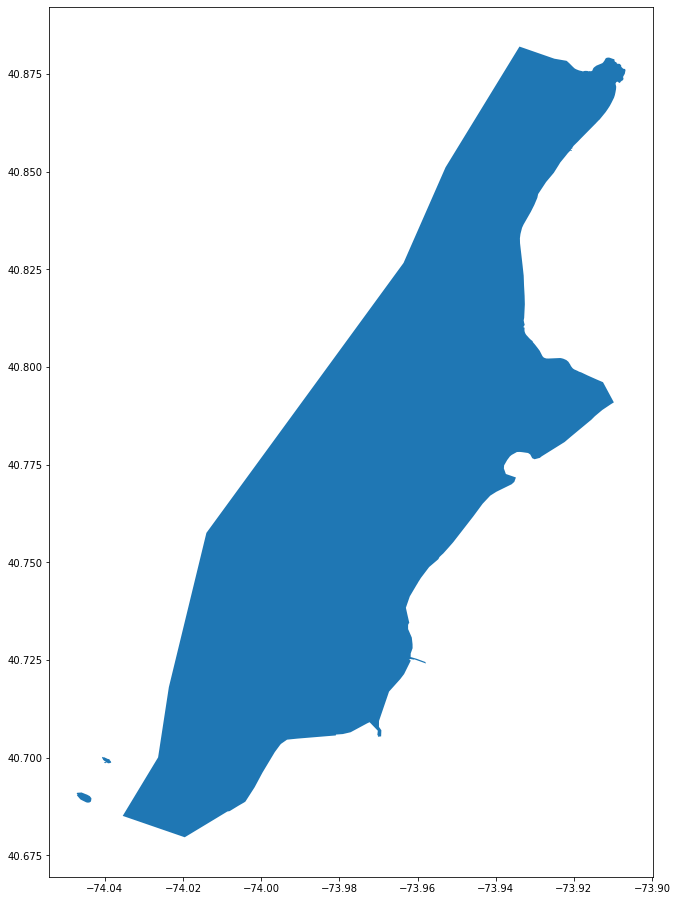

In [9]:
ny.plot(figsize=(24,16));

In [10]:
ny.contains(Point(40.750,-74))

30    False
dtype: bool

In [11]:
img_dir = "../data/images/"
data_dir = "../data/"
from scipy.io import loadmat
coordinates = loadmat(data_dir + "GPS_Long_Lat_Compass.mat")["GPS_Compass"] # Coordinates. Each coordinate corresponds to 6 pictures


In [12]:
type(coordinates[0][0])

numpy.float64

In [13]:
coordinates = [Point(c[1], c[0]) for c in coordinates]

In [14]:
coordinates_gpd = gpd.GeoDataFrame(geometry=coordinates)

In [15]:
coordinates_gpd

,geometry
0,POINT (-80.00000 40.44031)
1,POINT (-80.00680 40.44027)
2,POINT (-80.00670 40.44023)
3,POINT (-80.00660 40.44019)
4,POINT (-80.00650 40.44015)
...,...
10338,POINT (-74.00172 40.73055)
10339,POINT (-74.00160 40.73075)
10340,POINT (-74.00154 40.73085)
10341,POINT (-74.00149 40.73093)


In [16]:
import torch
import torchvision
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
import reverse_geocoder
from os import listdir
from os.path import isfile, join

In [17]:
### Returns an array of True/False if the coordinate is in a given state
### coordinates: An array of coordinates
### state: Full name of the state. ex= "New York"
def get_coordinates_in_state(coordinates, state):
    coords = [(lat,long) for lat,long,ele in coordinates]
    results = reverse_geocoder.search(coords, mode=2)
    state = [x['admin1']==state for x in results]
    return state

In [18]:
img_dir = "../data/images/"
data_dir = "../data/"
img_files = [f for f in listdir(img_dir) if isfile(join(img_dir, f))] # Names of all images in the folder
coordinates = loadmat(data_dir + "GPS_Long_Lat_Compass.mat")["GPS_Compass"] # Coordinates. Each coordinate corresponds to 6 pictures
in_ny = get_coordinates_in_state(coordinates=coordinates, state="New York") # All coordinates in NY
in_ny[:5]

Loading formatted geocoded file...


[False, False, False, False, False]

In [19]:
ny_coords = [coordinates[x] for x in range(len(in_ny)) if in_ny[x]]
coordinates = [Point(c[1], c[0]) for c in ny_coords]

In [20]:
ny_coordinates_gpd = gpd.GeoDataFrame(geometry=coordinates)

<AxesSubplot:>

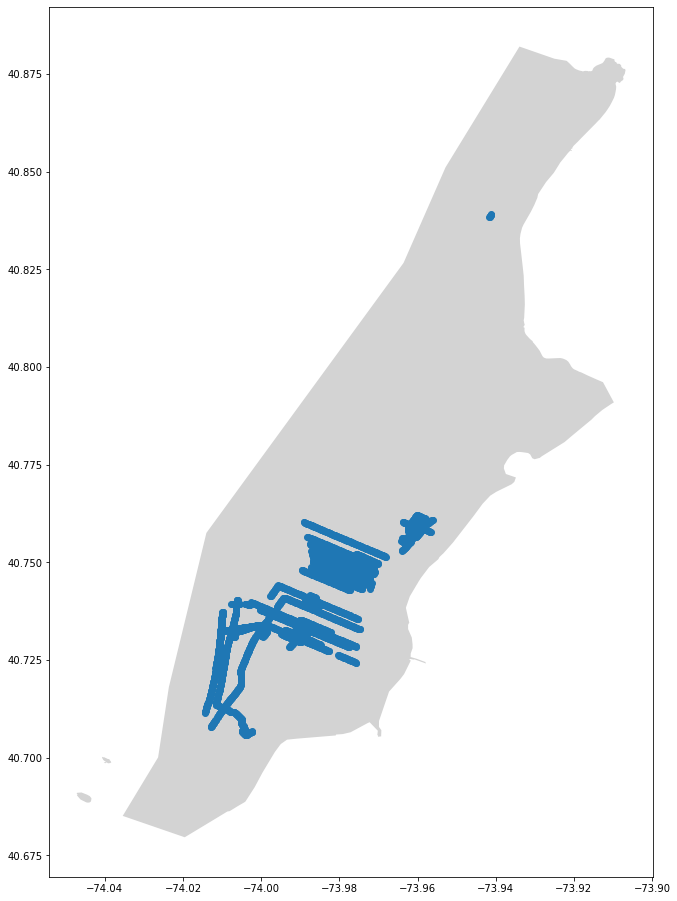

In [57]:
import matplotlib.pyplot as plt
ax = ny.plot(color='lightgrey',figsize=(16,16))
ny_coordinates_gpd.loc[:,'geometry'].plot(ax=ax)

In [22]:
bounds = ny.bounds
print(bounds)
list(bounds.values)

         minx       miny       maxx       maxy
30 -74.047207  40.679654 -73.906769  40.882012


[array([-74.0472072 ,  40.67965408, -73.90676928,  40.88201247])]

In [23]:
import pickle

pickle.dump(ny, open("ny.pkl","wb"))

In [24]:
import shapely
import gmaps
from shapely.geometry import Point, Polygon, box
from matplotlib import pyplot as plt
import numpy as np
import pickle

In [25]:
ny_coordinates_gpd

,geometry
0,POINT (-73.97108 40.74847)
1,POINT (-73.97120 40.74852)
2,POINT (-73.97131 40.74857)
3,POINT (-73.97141 40.74861)
4,POINT (-73.97152 40.74866)
...,...
4726,POINT (-74.00172 40.73055)
4727,POINT (-74.00160 40.73075)
4728,POINT (-74.00154 40.73085)
4729,POINT (-74.00149 40.73093)


In [26]:
import geopandas as gpd
from shapely.geometry import Polygon
import numpy as np
# points = gpd.read_file(data)
points = ny
points = ny_coordinates_gpd.loc[:,'geometry']
xmin,ymin,xmax,ymax =  points.total_bounds

print(points.total_bounds)
width = 2000
height = 1000
rows = int(np.ceil((ymax-ymin) /  height))
cols = int(np.ceil((xmax-xmin) / width))
XleftOrigin = xmin
XrightOrigin = xmin + width
YtopOrigin = ymax
YbottomOrigin = ymax- height
polygons = []
for i in range(cols):
    Ytop = YtopOrigin
    Ybottom =YbottomOrigin
    for j in range(rows):
        polygons.append(Polygon([(XleftOrigin, Ytop), (XrightOrigin, Ytop), (XrightOrigin, Ybottom), (XleftOrigin, Ybottom)])) 
        Ytop = Ytop - height
        Ybottom = Ybottom - height
    XleftOrigin = XleftOrigin + width
    XrightOrigin = XrightOrigin + width

grid = gpd.GeoDataFrame({'geometry':polygons})
grid.to_file("grid.shp")

[-74.014369  40.705793 -73.941109  40.839066]


<AxesSubplot:>

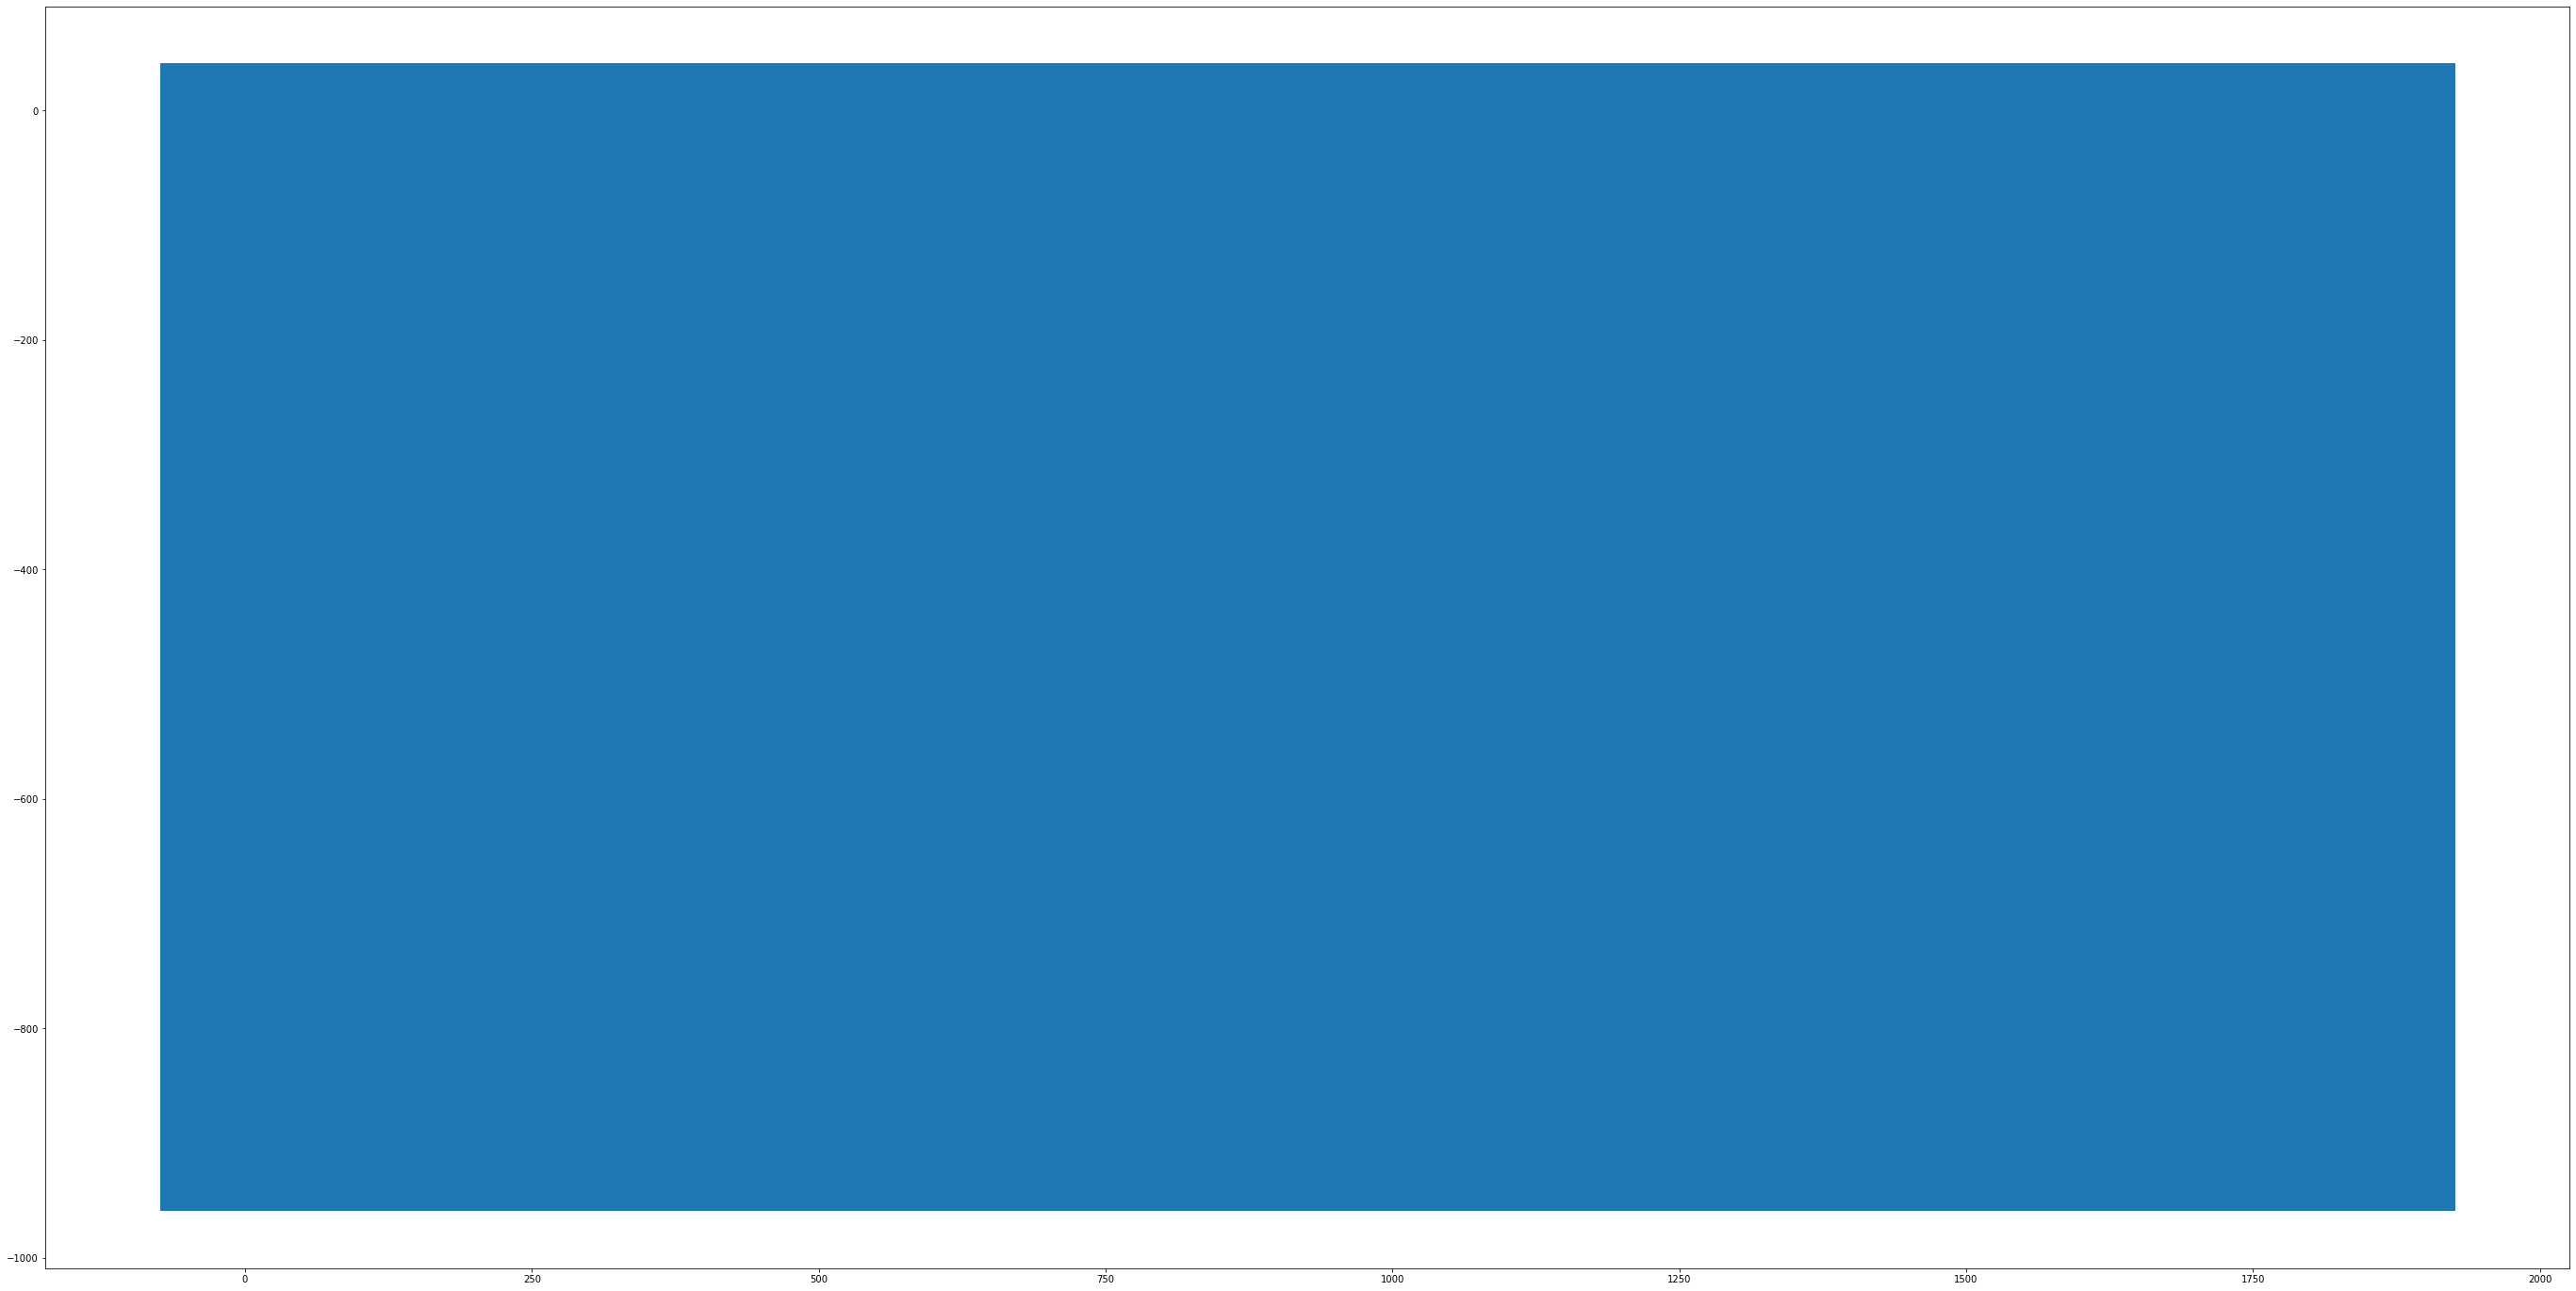

In [27]:
ax = ny.plot(color='lightgrey', figsize=(48,48))
grid.plot(ax=ax)
# ny.plot(ax=ax, color="lightgrey")

In [28]:
import numpy as np
from shapely.geometry import Point
# print(dir(ny))
print(ny.to_dict())


# parray = np.array(listarray)

# print(mypoints)
# print(parray)
# mycoordslist = [list(x.exterior.coords) for x in geom.geoms]


{30: <shapely.geometry.multipolygon.MultiPolygon object at 0x0000020A49B24D00>}


30    MULTIPOLYGON (((-74.04413 40.68854, -74.04435 ...
dtype: geometry
<class 'geopandas.geoseries.GeoSeries'>


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

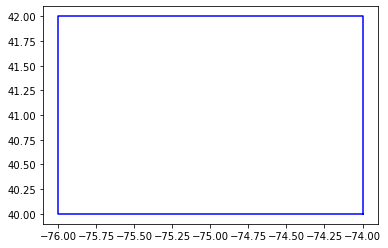

In [29]:
dim = 2
bounds = list(ny.bounds.values)[0]
xmin = int(bounds[0] // dim)
xmax = int(bounds[2] // dim)
ymin = int(bounds[1] // dim)
ymax = int(bounds[3] // dim)
for i in range(xmin, xmax+1):
    for j in range(ymin, ymax+1):
        b = box(i*dim, j*dim, (i+1)*dim, (j+1)*dim)
        g = ny.intersection(b)
        print(g)
        print(type(g))
        x,y = b.exterior.xy
        plt.plot(x,y,c='b')
        if g.empty or g.exterior==None:
            continue
        if type(g)==shapely.geometry.multipolygon.MultiPolygon:
            print(g)
            for gems in g.geoms:
                x,y = gems.exterior.xy
                plt.plot(x,y,c='r')
        else:
            x,y = g.exterior.xy
            plt.plot(x,y,c='r')
plt.show()



In [42]:
type(ny)

geopandas.geoseries.GeoSeries

In [41]:
np_ny[0].x

AttributeError: 'MultiPolygon' object has no attribute 'x'

In [52]:
def grid(src_vector, out_vector, size):

    # read the vector data in mercator proj
    gdf = gpd.read_file(src_vector).to_crs('EPSG:3857')
    
    # extract bounds from gdf 
    min_lon, min_lat, max_lon, max_lat = gdf.total_bounds
    
    # compute the longitudes and latitudes top left corner coordinates
    longitudes = np.arange(min_lon, max_lon, size)
    latitudes = np.arange(min_lat, max_lat, size)
    
    # create the grid centroids
    points = []
    for coords in product(longitudes, latitudes):
        points.append(Point(coords[0], coords[1]))

    # create a buffer grid in lat-long
    grid = gpd.GeoDataFrame({'geometry':points}, crs='EPSG:3857') \
        .buffer(size, cap_style=3)

    # clip to geometries
    grid = gpd.clip(grid, gdf).to_crs('EPSG:4326')
    
    # export as shapefile
    grid.to_file(out_vector)
    
    return


In [53]:
nb_cell = 6
grid_size = 30

gdf = gpd.GeoDataFrame({'geometry': [sg.Point(0,0)]}, crs='EPSG:3857').buffer(nb_cell*grid_size, cap_style=3)
dst = tmp_dir.joinpath('shapes.shp')
gdf.to_file(dst)

NameError: name 'sg' is not defined